In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
dataset_path="/content/drive/MyDrive/boat_type_classification_dataset"

# **1.	Build a CNN network to classify the boat.**

**1.1.**	Split the dataset into train and test in the ratio 80:20, with shuffle and random state=43.

**1.2.**	Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also supports data normalization.
(Hint: image_scale=1./255).

**1.3.**	Load train, validation and test dataset in batches of 32 using the function initialized in the above step.


In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=43,
    image_size=(256, 256),  # You can change the size based on the image resolution
    batch_size=32,
    label_mode='categorical',  # Use 'categorical' if you prefer one-hot encoding
    shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=43,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)

Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.


In [ ]:
class_names = train_dataset.class_names
print(class_names)  # ['buoy', 'cruise_ship', 'ferry_boat', ..., 'sailboat']


['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


In [ ]:
# Normalize the train and validation datasets
train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y))
validation_dataset = validation_dataset.map(lambda x, y: (x / 255.0, y))


# **1.4.	Build a CNN network using Keras with the following layers**

•	Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D

•	Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D

•	GLobalAveragePooling2D layer

•	Dense layer with 128 neurons and activation relu

•	Dense layer with 128 neurons and activation relu

•	Dense layer with 9 neurons and activation softmax.


In [ ]:
model = Sequential([
  #data_augmentation,
  #layers.Rescaling(1./255),

  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),

  layers.GlobalAveragePooling2D(),

  layers.Dense(128, activation='relu'),

  layers.Dense(128, activation='relu'),

  layers.Dense(9, activation='softmax'),

])

# **1.5.	Compile the model with Adam optimizer, categorical_crossentropy loss, and with metrics accuracy, precision, and recall.**

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # No need for from_logits
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


# **1.6.	Train the model for 20 epochs and plot training loss and accuracy against epochs.**

In [ ]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 408s 13s/step - accuracy: 0.3205 - loss: 1.9610 - precision: 0.4147 - recall: 0.0344 - val_accuracy: 0.3017 - val_loss: 1.8128 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.3399 - loss: 1.7840 - precision: 0.4375 - recall: 0.0107 - val_accuracy: 0.3017 - val_loss: 1.8131 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.3513 - loss: 1.8056 - precision: 0.5013 - recall: 0.0101 - val_accuracy: 0.3017 - val_loss: 1.7864 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.3491 - loss: 1.7457 - precision: 0.4823 - recall: 0.0400 - val_accuracy: 0.3017 - val_loss: 1.7790 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.3335 - loss: 1.7239 - precision: 0.5976 - recall: 0.0125 - val

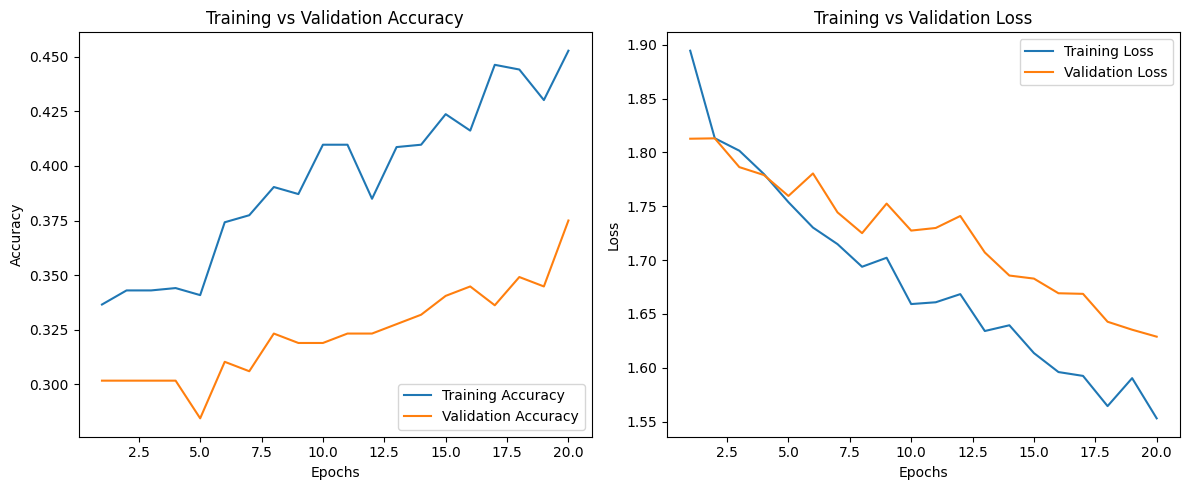

In [ ]:
# Extract metrics from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 21)  # 20 epochs

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

plt.tight_layout()
plt.show()


# **1.7.	Evaluate the model on test images and print the test loss and accuracy.**

In [ ]:
# Evaluate the model on the test dataset
eval_results = model.evaluate(validation_dataset)

# Print the results
print(f"Test Loss: {eval_results[0]:.4f}")
print(f"Test Accuracy: {eval_results[1]:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.3912 - loss: 1.6054 - precision: 0.5824 - recall: 0.1080
Test Loss: 1.6289
Test Accuracy: 0.3750


In [ ]:
# Get class names from the dataset
class_names = class_names

# Get true labels and predicted labels
y_true = []
y_pred = []



for images, labels in validation_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot to integer labels
    preds = model.predict(images)  # Get softmax probabilities
    y_pred.extend(np.argmax(preds, axis=1))  # Convert softmax output to class index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


# **1.8.	Plot heatmap of the confusion matrix and print classification report.**

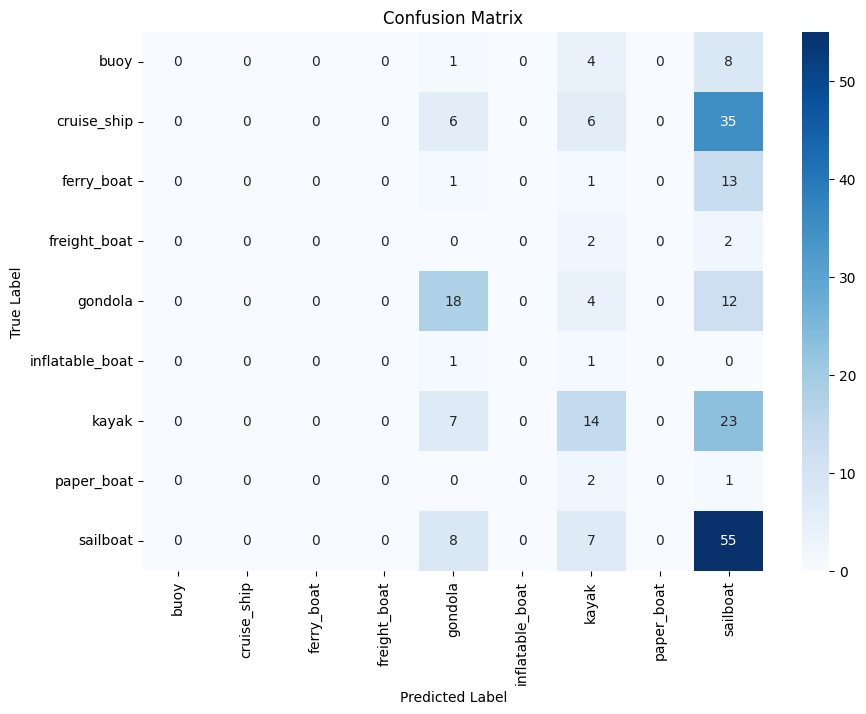

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:

                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        13
    cruise_ship       0.00      0.00      0.00        47
     ferry_boat       0.00      0.00      0.00        15
   freight_boat       0.00      0.00      0.00         4
        gondola       0.43      0.53      0.47        34
inflatable_boat       0.00      0.00      0.00         2
          kayak       0.34      0.32      0.33        44
     paper_boat       0.00      0.00      0.00         3
       sailboat       0.37      0.79      0.50        70

       accuracy                           0.38       232
      macro avg       0.13      0.18      0.15       232
   weighted avg       0.24      0.38      0.28       232



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **2.	Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. You can use any lightweight pre-trained model as the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built using Keras API.**

**2.1.**	Split the dataset into train and test datasets in the ration 70:30, with shuffle and random state=1

**2.2.**	Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also supports data normalization.
(Hint: Image_scale=1./255).

**2.3.**	Load train, validation and test datasets in batches of 32 using the function initialized in the above step.



In [ ]:
train_dataset2 = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="training",
    seed=1,
    image_size=(256, 256),  # You can change the size based on the image resolution
    batch_size=32,
    label_mode='categorical',  # Use 'categorical' if you prefer one-hot encoding
    shuffle=True
)

validation_dataset2 = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=1,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)

Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.


In [ ]:
# Normalize the train and validation datasets
train_dataset2 = train_dataset2.map(lambda x, y: (x / 255.0, y))
validation_dataset2 = validation_dataset2.map(lambda x, y: (x / 255.0, y))


# **2.4.	Build a CNN network using Keras with the following layers.**

•	Load MobileNetV2 - Light Model as the first layer
(Hint: Keras API Doc)

•	GLobalAveragePooling2D layer

•	Dropout(0.2)

•	Dense layer with 256 neurons and activation relu

•	BatchNormalization layer

•	Dropout(0.1)

•	Dense layer with 128 neurons and activation relu

•	BatchNormalization layer

•	Dropout(0.1)

•	Dense layer with 9 neurons and activation softmax


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base model


<ipython-input-21-d36c1ea4d8b5>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = Sequential([
    base_model,

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(9, activation='softmax')  # Assuming 9 classes
])

# **2.5.	Compile the model with Adam optimizer, categorical_crossentropy loss, and metrics accuracy, Precision, and Recall.**

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# **2.6.	Train the model for 50 epochs and Early stopping while monitoring validation loss.**



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,621,513 (10.00 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
model.fit(train_dataset2, validation_data=validation_dataset2, epochs=50, callbacks=[early_stopping])


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 897ms/step - accuracy: 0.4820 - loss: 1.7031 - precision_1: 0.6529 - recall_1: 0.3502 - val_accuracy: 0.8075 - val_loss: 0.7167 - val_precision_1: 0.9289 - val_recall_1: 0.6753
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.8846 - loss: 0.3766 - precision_1: 0.9227 - recall_1: 0.8391 - val_accuracy: 0.8448 - val_loss: 0.5513 - val_precision_1: 0.9201 - val_recall_1: 0.7615
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.9458 - loss: 0.2512 - precision_1: 0.9645 - recall_1: 0.9134 - val_accuracy: 0.8534 - val_loss: 0.5041 - val_precision_1: 0.9097 - val_recall_1: 0.8103
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9574 - loss: 0.1752 - precision_1: 0.9674 - recall_1: 0.9382 - val_accuracy: 0.8420 - val_loss: 0.4919 - val_precision_1: 0.8984 - val_recall_1: 0.8132
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.9853 - loss: 0.0989 - precision_1: 0.9911 - recall_1: 0.9726 

# **2.7.	Evaluate the model on test images and print the test loss and accuracy.**




In [ ]:
eval_results2 = model.evaluate(validation_dataset2)

# Print the results
print(f"Test Loss: {eval_results2[0]:.4f}")
print(f"Test Accuracy: {eval_results2[1]:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.8667 - loss: 0.4973 - precision_1: 0.8944 - recall_1: 0.8594
Test Loss: 0.4806
Test Accuracy: 0.8707


# **2.8.	Plot Train loss Vs Validation loss and Train accuracy Vs Validation accuracy.**

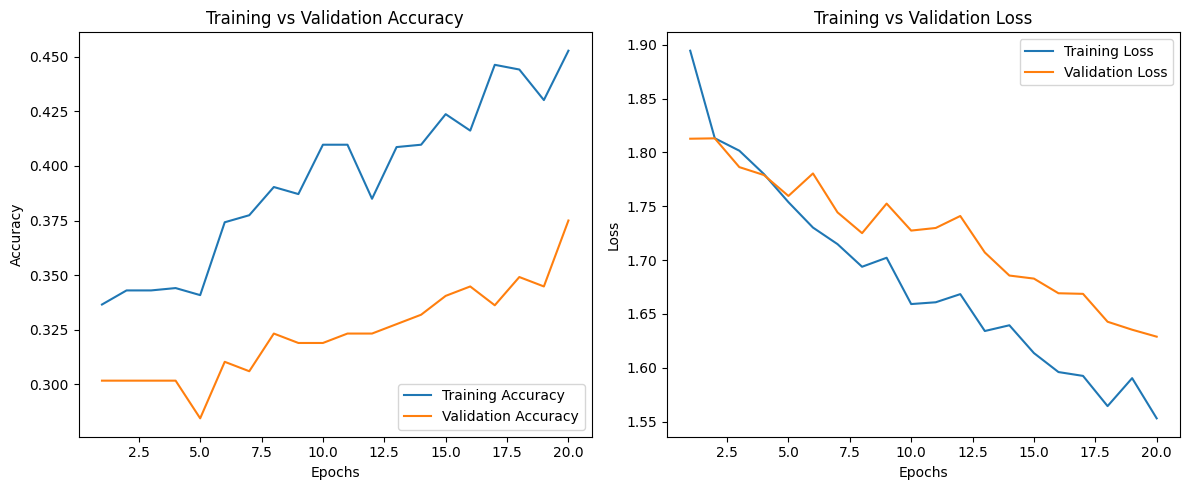

In [ ]:
# Extract metrics from training history
acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs_range2 = range(1, len(acc2) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range2, acc2, label="Training Accuracy")
plt.plot(epochs_range2, val_acc2, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range2, loss2, label="Training Loss")
plt.plot(epochs_range2, val_loss2, label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

plt.tight_layout()
plt.show()


In [ ]:
# Get class names from the dataset
class_names = class_names

# Get true labels and predicted labels
y_true2 = []
y_pred2 = []



for images, labels in validation_dataset:
    y_true2.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot to integer labels
    preds2 = model.predict(images)  # Get softmax probabilities
    y_pred2.extend(np.argmax(preds2, axis=1))  # Convert softmax output to class index

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


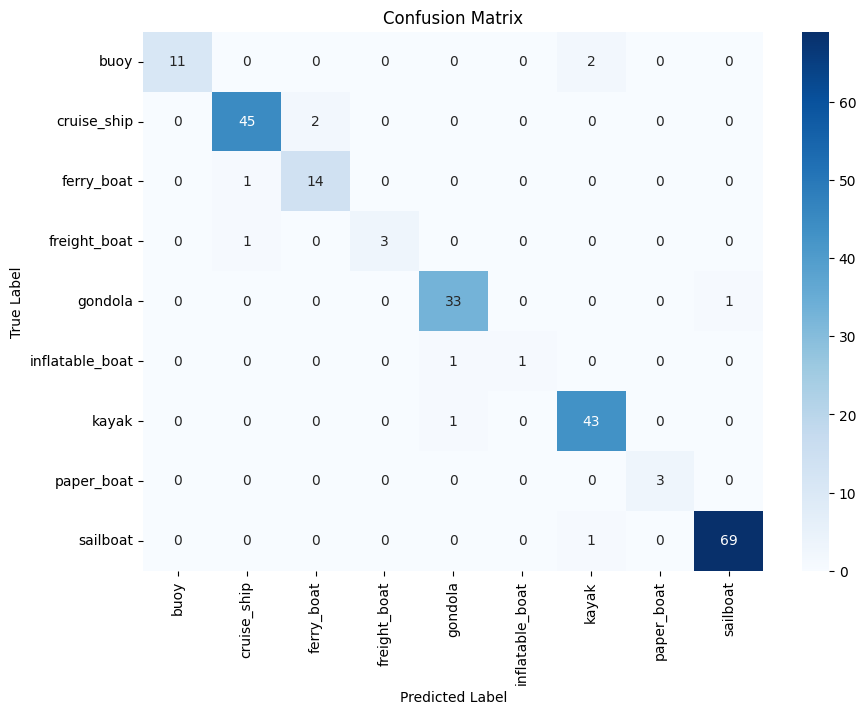

In [ ]:
cm2 = confusion_matrix(y_true2, y_pred2)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("Classification Report:\n")
print(classification_report(y_true2, y_pred2, target_names=class_names))

Classification Report:

                 precision    recall  f1-score   support

           buoy       1.00      0.85      0.92        13
    cruise_ship       0.96      0.96      0.96        47
     ferry_boat       0.88      0.93      0.90        15
   freight_boat       1.00      0.75      0.86         4
        gondola       0.94      0.97      0.96        34
inflatable_boat       1.00      0.50      0.67         2
          kayak       0.93      0.98      0.96        44
     paper_boat       1.00      1.00      1.00         3
       sailboat       0.99      0.99      0.99        70

       accuracy                           0.96       232
      macro avg       0.97      0.88      0.91       232
   weighted avg       0.96      0.96      0.96       232




3.	Compare the results of both models built in steps 1 and 2 and state your observations.


## **1. Performance Metrics Comparison:**

### **Metric	Model 1 (Custom CNN)**
**Accuracy**	38%
**Precision**	13% (macro avg)

**Recall**	18% (macro avg)

**F1-Score**	15% (macro avg)

### **Model 2 (MobileNetV2 - Transfer Learning)**

**Accuracy**	96%

**Precision**	97% (macro avg)

**Recall**		88% (macro avg)

**F1-Score**	91% (macro avg)

## **2. Observations:**

**Model 2 (MobileNetV2) Outperforms Model 1:**

*  The second model achieves 96% accuracy, significantly higher than the 38% accuracy of the first model.
*   Precision, Recall, and F1-score are considerably better for Model 2, suggesting a robust performance across all classes.

**Class-wise Performance:**

*  Model 1 struggles with most classes, with only gondola, kayak, and sailboat showing moderate recall.
*   Model 2 achieves near-perfect classification in most classes, including perfect classification for paper_boat and high recall for sailboat and cruise_ship.


**Transfer Learning Advantage:** MobileNetV2 is pre-trained on large datasets (like ImageNet), which allows it to extract high-level features more effectively.

**Regularization Techniques:** The use of dropout and batch normalization in Model 2 prevents overfitting, enhancing generalization.

**Despite being lightweight **(optimized for mobile deployment), MobileNetV2 shows superior accuracy, making it highly suitable for real-world applications.

## **3. Confusion Matrix Insights:**

**Model 1:** High misclassifications, especially among visually similar classes (e.g., cruise_ship and sailboat).

**Model 2:** Very few misclassifications, with clearer diagonal dominance in the confusion matrix indicating better class separability.

## **Conclusion:**

Model 2, leveraging transfer learning with MobileNetV2, drastically outperforms the model 1 across all performance metrics. It is not only more accurate but also computationally efficient, making it highly suitable for deployment on mobile devices.